### 🟦 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")

### 🟦 Getting Cleaned Data from Repository

In [2]:
data = pd.read_csv("..\Data\data-cleaned.csv")

In [3]:
data

,Model year,Make,Vehicle class,Engine size (L),Cylinders,Transmission,Number of gears,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km)
0,1995,Acura,Subcompact,1.8,4,A,4,Regular gasoline,11.6,8.3,10.1,232
1,1995,Acura,Subcompact,1.8,4,M,5,Regular gasoline,11.0,8.3,9.8,225
2,1995,Acura,Subcompact,1.8,4,M,5,Premium gasoline,10.8,8.3,9.7,223
3,1995,Acura,Compact,3.2,6,A,4,Premium gasoline,14.2,10.5,12.5,288
4,1995,Acura,Compact,3.2,6,A,4,Premium gasoline,14.6,11.0,13.0,299
...,...,...,...,...,...,...,...,...,...,...,...,...
27507,2025,Volvo,Station wagon,2.0,4,AS,8,Premium gasoline,9.7,7.5,8.7,205
27508,2025,Volvo,Station wagon,2.0,4,AS,8,Premium gasoline,10.7,8.1,9.5,223
27509,2025,Volvo,Sport utility vehicle,2.0,4,AS,8,Premium gasoline,10.1,7.8,9.1,213
27510,2025,Volvo,Sport utility vehicle,2.0,4,AS,8,Premium gasoline,10.0,7.8,9.0,212


### 🟦 Data Preprocessing

🔹 Showing th Correlation of variables of dataset

<Axes: >

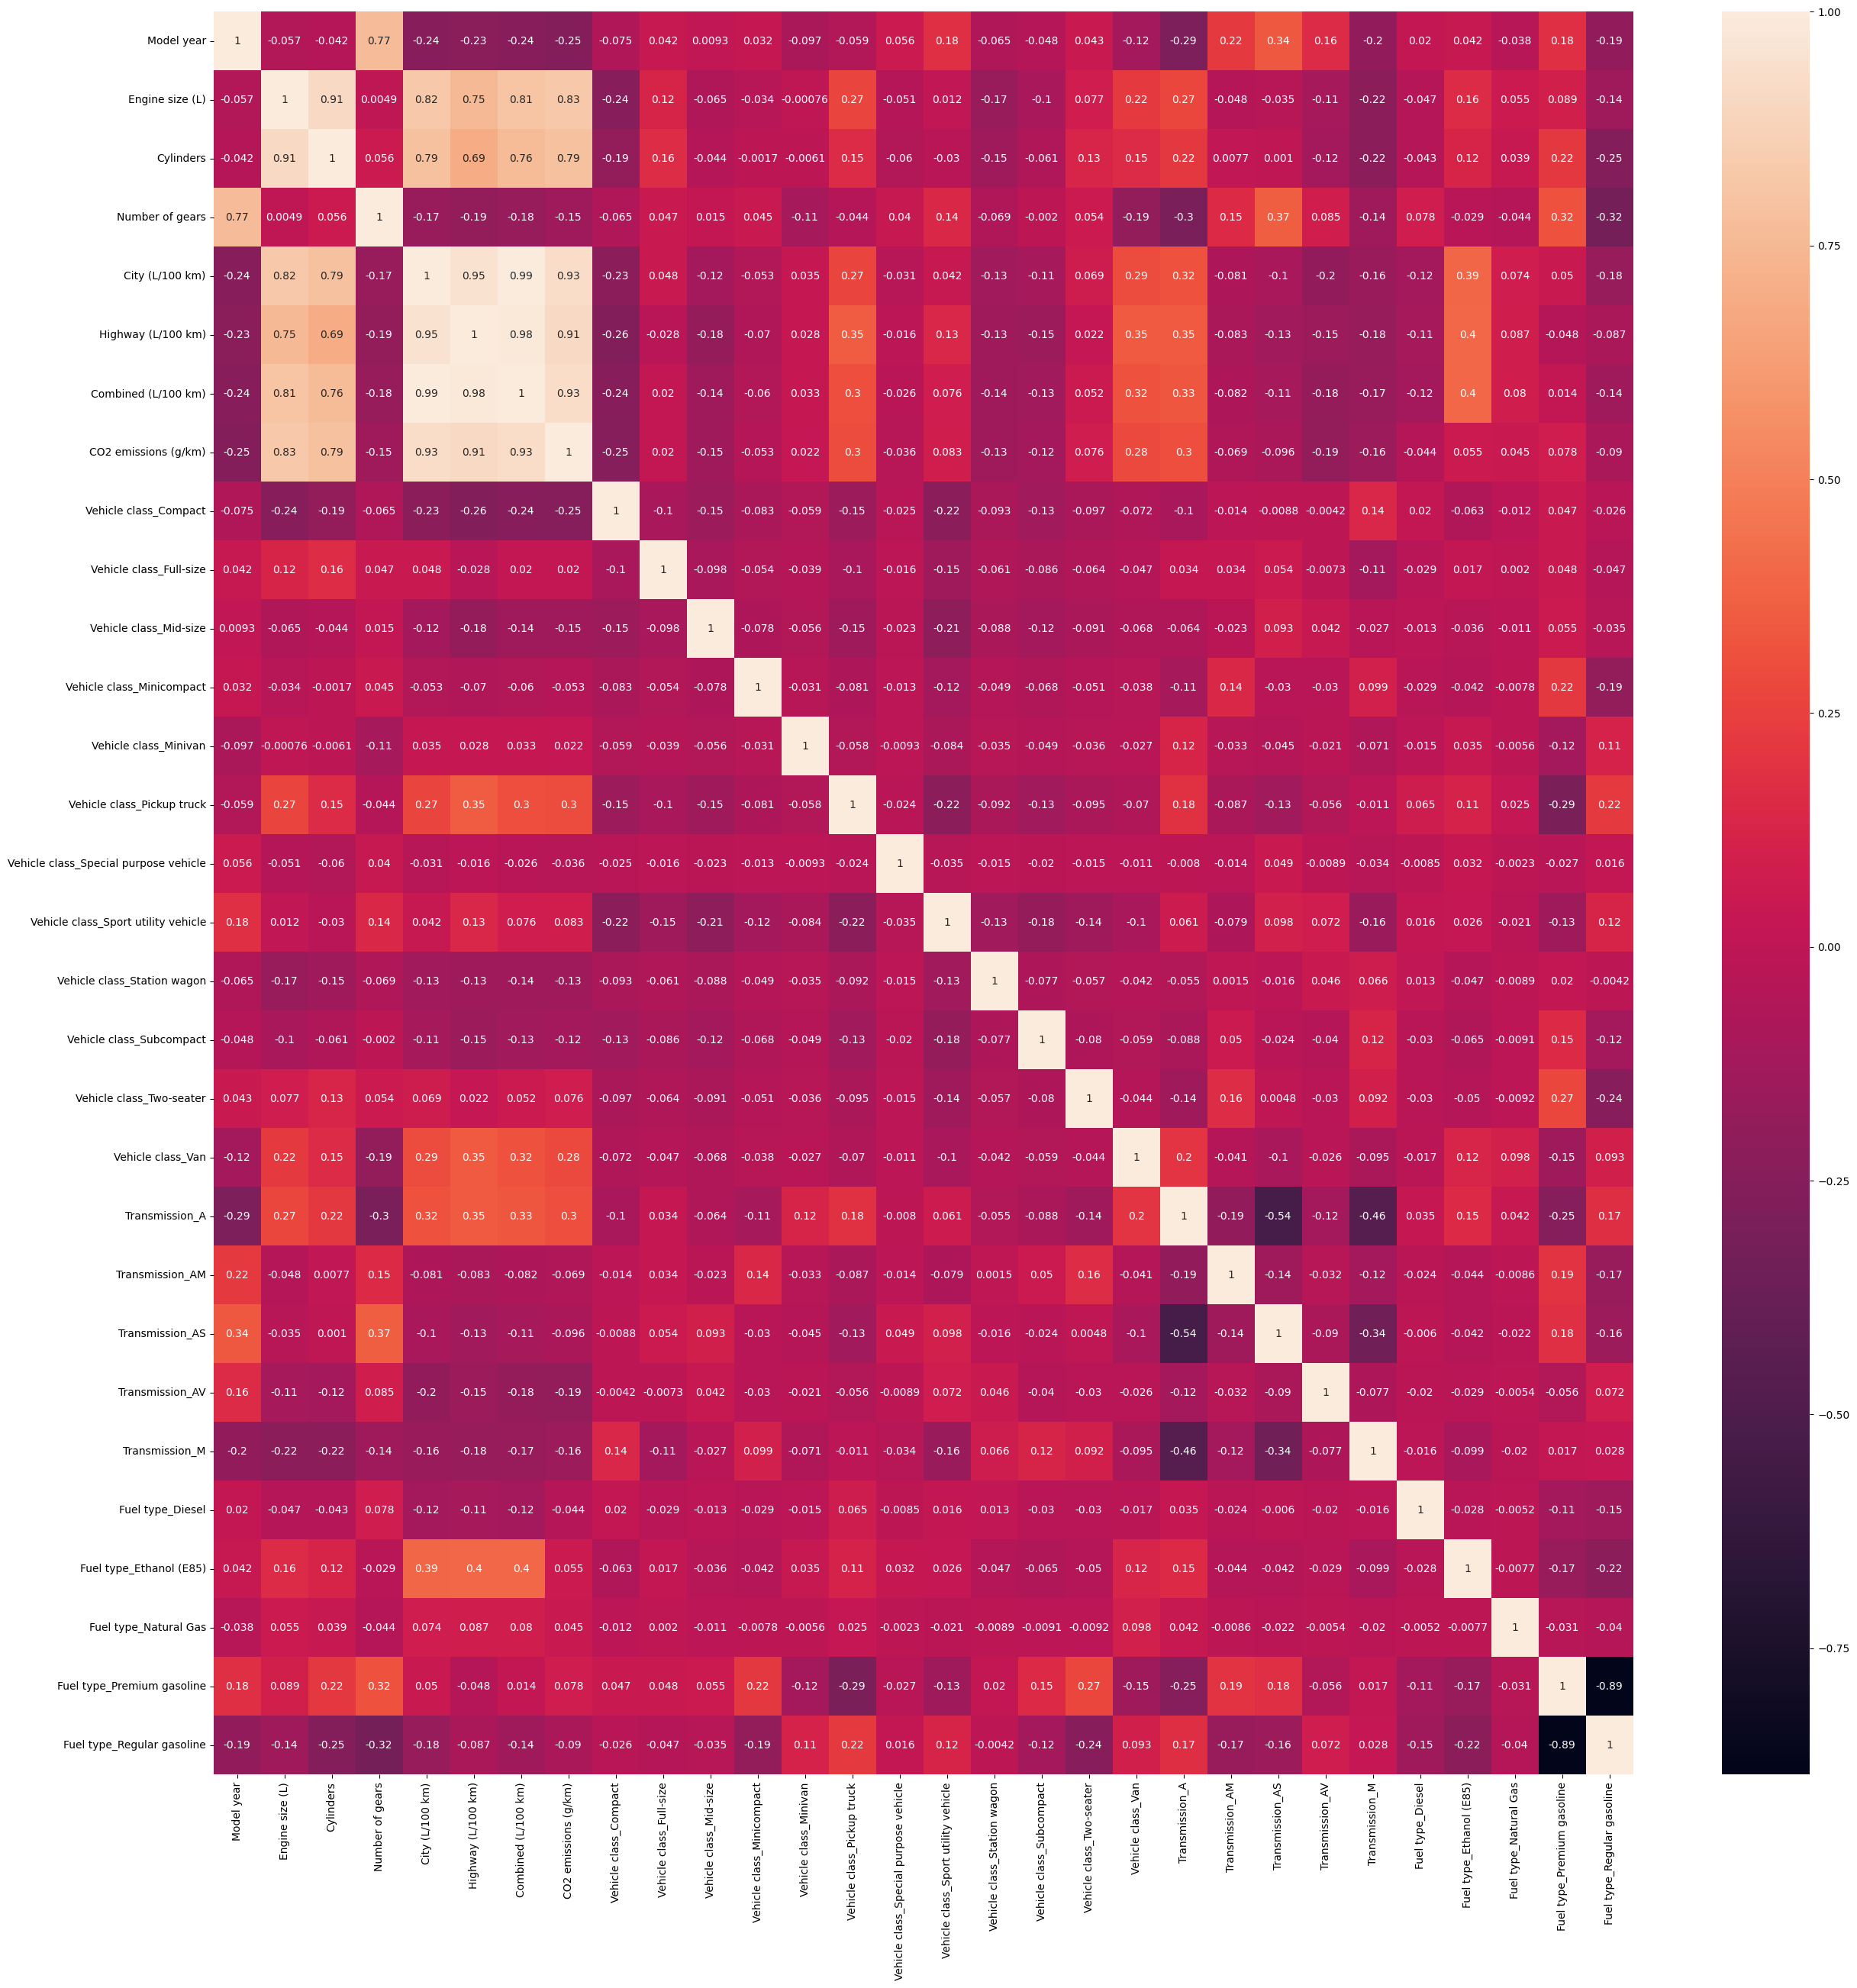

In [4]:
corr = pd.get_dummies(data[["Vehicle class", "Transmission","Fuel type", "Model year", "Engine size (L)", "Cylinders", "Number of gears", "City (L/100 km)", "Highway (L/100 km)", "Combined (L/100 km)", "CO2 emissions (g/km)"]]).corr()
plt.figure(figsize=(30,30))
sns.heatmap(data=corr, annot=True)

🔹 Splitting Data to Categorical and Numerical X and y sets

In [5]:
X_cat = data.loc[:, ["Make", "Vehicle class", "Transmission","Fuel type"]]
X_num = data.loc[:, ["Model year", "Engine size (L)", "Cylinders", "Number of gears"]]
y_city = data.loc[:, ["City (L/100 km)"]]
y_highway = data.loc[:, ["Highway (L/100 km)"]]
y_combined = data.loc[:, ["Combined (L/100 km)"]]
y_co2 = data.loc[:, ["CO2 emissions (g/km)"]]

🔹 Encoding categorical data (X_cat)

In [6]:
encoder = OneHotEncoder()

X_cat_ENCODED = pd.DataFrame(encoder.fit_transform(X_cat).toarray())
X_cat_ENCODED.columns = X_cat_ENCODED.columns.astype(str)

with open("..\Model & Objects\encoder.pkl", "wb") as encoder_file:
    pickle.dump(encoder, encoder_file)

In [7]:
X_cat_ENCODED

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
encoder.transform([["Chevrolet", "Station wagon", "M", "Premium gasoline"]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [9]:
encoder.inverse_transform([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.0, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.]])

array([['Honda', 'Minivan', 'AM', 'Premium gasoline']], dtype=object)

In [10]:
X_new = pd.concat([X_cat_ENCODED, X_num], axis=1)

In [11]:
X_new

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,Model year,Engine size (L),Cylinders,Number of gears
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1995,1.8,4,4
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1995,1.8,4,5
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1995,1.8,4,5
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1995,3.2,6,4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1995,3.2,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2025,2.0,4,8
27508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2025,2.0,4,8
27509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2025,2.0,4,8
27510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2025,2.0,4,8


🔹 Splitting X and y to train and test sets

In [12]:
X_train, X_test, y_train_city, y_test_city = train_test_split(X_new, y_city, test_size=0.15, random_state=0)
X_train, X_test, y_train_highway, y_test_highway = train_test_split(X_new, y_highway, test_size=0.15, random_state=0)
X_train, X_test, y_train_combined, y_test_combined = train_test_split(X_new, y_combined, test_size=0.15, random_state=0)
X_train, X_test, y_train_co2, y_test_co2 = train_test_split(X_new, y_co2, test_size=0.15, random_state=0)

In [13]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,Model year,Engine size (L),Cylinders,Number of gears
18537,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2016,3.0,6,8
9689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2007,5.3,8,4
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1995,5.7,8,5
24311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2021,3.0,6,8
8586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2006,8.3,10,6


🔹 Standardizng X_train data

In [14]:
standardizer = StandardScaler()

X_train_STANDARDED = standardizer.fit_transform(X_train)

with open("..\Model & Objects\standardizer.pkl", "wb") as standardizer_file:
    pickle.dump(standardizer, standardizer_file)

In [15]:
pd.DataFrame(X_train_STANDARDED)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.109085,-0.048554,-0.067159,-0.192668,3.775500,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,0.647270,-0.274975,0.069401,1.288009
1,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,-0.833185,0.941135,-0.424958,1.446698,1.172324,-1.200586
2,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,3.102373,...,1.851976,-0.135236,-0.205552,-0.038158,-0.833185,0.941135,-1.854596,1.746119,1.172324,-0.578437
3,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,1.242952,-0.274975,0.069401,1.288009
4,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,1.851976,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,-0.544095,3.692358,2.275247,0.043711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23380,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,-0.067549,2.494672,3.378169,0.043711
23381,-0.109085,-0.048554,-0.067159,-0.192668,3.775500,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,7.394496,-0.205552,-0.038158,-0.833185,-1.062547,0.766406,-1.023529,-1.033521,1.288009
23382,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,1.200214,-1.062547,-0.424958,0.922710,1.172324,1.288009
23383,-0.109085,-0.048554,-0.067159,-0.192668,-0.264866,-0.081153,-0.024475,-0.112643,-0.138478,-0.322334,...,-0.539964,-0.135236,-0.205552,-0.038158,-0.833185,0.941135,-0.305822,-0.499541,0.069401,-0.578437


### 🟦 Model Training

#### 🔹 Linear Regression

🔹 Model training

In [16]:
model_city_lr = LinearRegression()
model_highway_lr = LinearRegression()
model_combined_lr = LinearRegression()
model_co2_lr = LinearRegression()

model_city_lr.fit(X_train_STANDARDED, y_train_city)
model_highway_lr.fit(X_train_STANDARDED, y_train_highway)
model_combined_lr.fit(X_train_STANDARDED, y_train_combined)
model_co2_lr.fit(X_train_STANDARDED, y_train_co2)

LinearRegression()

🔹 Predict the X_train and X_test

In [17]:
y_pred_train_city_lr = model_city_lr.predict(X_train_STANDARDED)
y_pred_train_highway_lr = model_highway_lr.predict(X_train_STANDARDED)
y_pred_train_combined_lr = model_combined_lr.predict(X_train_STANDARDED)
y_pred_train_co2_lr = model_co2_lr.predict(X_train_STANDARDED)

In [18]:
y_pred_test_city_lr = model_city_lr.predict(standardizer.transform(X_test))
y_pred_test_highway_lr = model_highway_lr.predict(standardizer.transform(X_test))
y_pred_test_combined_lr = model_combined_lr.predict(standardizer.transform(X_test))
y_pred_test_co2_lr = model_co2_lr.predict(standardizer.transform(X_test))

🔹 Evaluate the prediction of the models for X_train and X_test

In [19]:
print("For X_train prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_train_city, y_pred_train_city_lr), 3)*100)
print("      Highway model:",round(r2_score(y_train_highway, y_pred_train_highway_lr), 3)*100)
print("      Combined model:",round(r2_score(y_train_combined, y_pred_train_combined_lr), 3)*100)
print("      CO2 model:",round(r2_score(y_train_co2, y_pred_train_co2_lr), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_train_city, y_pred_train_city_lr)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_train_highway, y_pred_train_highway_lr)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_train_combined, y_pred_train_combined_lr)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_train_co2, y_pred_train_co2_lr)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_train_city, y_pred_train_city_lr), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_train_highway, y_pred_train_highway_lr), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_train_combined, y_pred_train_combined_lr), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_train_co2, y_pred_train_co2_lr), 3)*100)

For X_train prediction:
   R2 score:
      City model: 88.0
      Highway model: 84.5
      Combined model: 87.6
      CO2 model: 85.0
   RMSE:
      City model: 0.808
      Highway model: 0.512
      Combined model: 0.611
      CO2 model: 313.312
   MAPE:
      City model: 7.1
      Highway model: 7.5
      Combined model: 6.9
      CO2 model: 6.9


In [20]:
print("For X_test prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_test_city, y_pred_test_city_lr), 3)*100)
print("      Highway model:",round(r2_score(y_test_highway, y_pred_test_highway_lr), 3)*100)
print("      Combined model:",round(r2_score(y_test_combined, y_pred_test_combined_lr), 3)*100)
print("      CO2 model:",round(r2_score(y_test_co2, y_pred_test_co2_lr), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_test_city, y_pred_test_city_lr)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_test_highway, y_pred_test_highway_lr)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_test_combined, y_pred_test_combined_lr)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_test_co2, y_pred_test_co2_lr)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_test_city, y_pred_test_city_lr), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_test_highway, y_pred_test_highway_lr), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_test_combined, y_pred_test_combined_lr), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_test_co2, y_pred_test_co2_lr), 3)*100)

For X_test prediction:
   R2 score:
      City model: 88.1
      Highway model: 84.6
      Combined model: 87.7
      CO2 model: 85.3
   RMSE:
      City model: 0.769
      Highway model: 0.485
      Combined model: 0.577
      CO2 model: 300.738
   MAPE:
      City model: 6.9
      Highway model: 7.3999999999999995
      Combined model: 6.800000000000001
      CO2 model: 6.800000000000001


🔹 Tune the hyperparameters

In [ ]:
print('Hyperparameters currently in use:')
print(model_city_lr.get_params())
print(model_highway_lr.get_params())
print(model_combined_lr.get_params())
print(model_co2_lr.get_params())

The best hyperparameters was has been set. no change needed.

🔹 Save the model

In [21]:
with open("..\Model & Objects\model_city_lr.pkl", "wb") as model_city_lr_file:
    pickle.dump(model_city_lr, model_city_lr_file)
with open("..\Model & Objects\model_highway_lr.pkl", "wb") as model_highway_lr_file:
    pickle.dump(model_highway_lr, model_highway_lr_file)
with open("..\Model & Objects\model_combined_lr.pkl", "wb") as model_combined_lr_file:
    pickle.dump(model_combined_lr, model_combined_lr_file)
with open("..\Model & Objects\model_co2_lr.pkl", "wb") as model_co2_lr_file:
    pickle.dump(model_co2_lr, model_co2_lr_file)

#### 🔹 K-Nearest Neighbors

🔹 Model training

In [22]:
model_city_knn = KNeighborsRegressor()
model_highway_knn = KNeighborsRegressor()
model_combined_knn = KNeighborsRegressor()
model_co2_knn = KNeighborsRegressor()

model_city_knn.fit(X_train_STANDARDED, y_train_city)
model_highway_knn.fit(X_train_STANDARDED, y_train_highway)
model_combined_knn.fit(X_train_STANDARDED, y_train_combined)
model_co2_knn.fit(X_train_STANDARDED, y_train_co2)

KNeighborsRegressor()

🔹 Predict the X_train and X_test

In [23]:
y_pred_train_city_knn = model_city_knn.predict(X_train_STANDARDED)
y_pred_train_highway_knn = model_highway_knn.predict(X_train_STANDARDED)
y_pred_train_combined_knn = model_combined_knn.predict(X_train_STANDARDED)
y_pred_train_co2_knn = model_co2_knn.predict(X_train_STANDARDED)

In [24]:
y_pred_test_city_knn = model_city_knn.predict(standardizer.transform(X_test))
y_pred_test_highway_knn = model_highway_knn.predict(standardizer.transform(X_test))
y_pred_test_combined_knn = model_combined_knn.predict(standardizer.transform(X_test))
y_pred_test_co2_knn = model_co2_knn.predict(standardizer.transform(X_test))

🔹 Evaluate the prediction of the models for X_train and X_test

In [25]:
print("For X_train prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_train_city, y_pred_train_city_knn), 3)*100)
print("      Highway model:",round(r2_score(y_train_highway, y_pred_train_highway_knn), 3)*100)
print("      Combined model:",round(r2_score(y_train_combined, y_pred_train_combined_knn), 3)*100)
print("      CO2 model:",round(r2_score(y_train_co2, y_pred_train_co2_knn), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_train_city, y_pred_train_city_knn)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_train_highway, y_pred_train_highway_knn)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_train_combined, y_pred_train_combined_knn)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_train_co2, y_pred_train_co2_knn)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_train_city, y_pred_train_city_knn), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_train_highway, y_pred_train_highway_knn), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_train_combined, y_pred_train_combined_knn), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_train_co2, y_pred_train_co2_knn), 3)*100)

For X_train prediction:
   R2 score:
      City model: 96.6
      Highway model: 95.5
      Combined model: 96.39999999999999
      CO2 model: 95.6
   RMSE:
      City model: 0.228
      Highway model: 0.149
      Combined model: 0.176
      CO2 model: 91.164
   MAPE:
      City model: 3.2
      Highway model: 3.5999999999999996
      Combined model: 3.2
      CO2 model: 3.3000000000000003


In [26]:
print("For X_test prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_test_city, y_pred_test_city_knn), 3)*100)
print("      Highway model:",round(r2_score(y_test_highway, y_pred_test_highway_knn), 3)*100)
print("      Combined model:",round(r2_score(y_test_combined, y_pred_test_combined_knn), 3)*100)
print("      CO2 model:",round(r2_score(y_test_co2, y_pred_test_co2_knn), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_test_city, y_pred_test_city_knn)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_test_highway, y_pred_test_highway_knn)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_test_combined, y_pred_test_combined_knn)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_test_co2, y_pred_test_co2_knn)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_test_city, y_pred_test_city_knn), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_test_highway, y_pred_test_highway_knn), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_test_combined, y_pred_test_combined_knn), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_test_co2, y_pred_test_co2_knn), 3)*100)

For X_test prediction:
   R2 score:
      City model: 93.89999999999999
      Highway model: 92.9
      Combined model: 93.89999999999999
      CO2 model: 92.9
   RMSE:
      City model: 0.395
      Highway model: 0.222
      Combined model: 0.289
      CO2 model: 145.959
   MAPE:
      City model: 4.3
      Highway model: 4.5
      Combined model: 4.2
      CO2 model: 4.2


🔹 Tune the hyperparameters

In [ ]:
print('Hyperparameters currently in use:')
print(model_city_knn.get_params())
print(model_highway_knn.get_params())
print(model_combined_knn.get_params())
print(model_co2_knn.get_params())

In [ ]:
param_grid_knn = {
    'weights': ['uniform', 'distance'],
    'p': list(range(1, 4)),
    'n_neighbors': list(range(4, 7)),
    'algorithm': ["auto"],
}

In [ ]:
temp_model_combined_knn = KNeighborsRegressor()
temp_model_co2_knn = KNeighborsRegressor()

grid_search_combined_knn = GridSearchCV(estimator=temp_model_combined_knn, param_grid=param_grid_knn, cv=4)
grid_search_combined_knn.fit(X_train_STANDARDED, y_train_combined)
print(grid_search_combined_knn.best_params_)

grid_search_co2_knn = GridSearchCV(estimator=temp_model_co2_knn, param_grid=param_grid_knn, cv=4)
grid_search_co2_knn.fit(X_train_STANDARDED, y_train_co2)
print(grid_search_co2_knn.best_params_)

🔹 Model training with best hyperparameters

In [ ]:
model_city_knn = KNeighborsRegressor()
model_highway_knn = KNeighborsRegressor()
model_combined_knn = KNeighborsRegressor()
model_co2_knn = KNeighborsRegressor()

model_city_knn.fit(X_train_STANDARDED, y_train_city)
model_highway_knn.fit(X_train_STANDARDED, y_train_highway)
model_combined_knn.fit(X_train_STANDARDED, y_train_combined)
model_co2_knn.fit(X_train_STANDARDED, y_train_co2)

🔹 Predict the X_train and X_test

In [ ]:
y_pred_train_city_knn = model_city_knn.predict(X_train_STANDARDED)
y_pred_train_highway_knn = model_highway_knn.predict(X_train_STANDARDED)
y_pred_train_combined_knn = model_combined_knn.predict(X_train_STANDARDED)
y_pred_train_co2_knn = model_co2_knn.predict(X_train_STANDARDED)

In [ ]:
y_pred_test_city_knn = model_city_knn.predict(standardizer.transform(X_test))
y_pred_test_highway_knn = model_highway_knn.predict(standardizer.transform(X_test))
y_pred_test_combined_knn = model_combined_knn.predict(standardizer.transform(X_test))
y_pred_test_co2_knn = model_co2_knn.predict(standardizer.transform(X_test))

🔹 Evaluate the prediction of the models for X_train and X_test

In [ ]:
print("For X_train prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_train_city, y_pred_train_city_knn), 3)*100)
print("      Highway model:",round(r2_score(y_train_highway, y_pred_train_highway_knn), 3)*100)
print("      Combined model:",round(r2_score(y_train_combined, y_pred_train_combined_knn), 3)*100)
print("      CO2 model:",round(r2_score(y_train_co2, y_pred_train_co2_knn), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_train_city, y_pred_train_city_knn)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_train_highway, y_pred_train_highway_knn)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_train_combined, y_pred_train_combined_knn)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_train_co2, y_pred_train_co2_knn)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_train_city, y_pred_train_city_knn), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_train_highway, y_pred_train_highway_knn), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_train_combined, y_pred_train_combined_knn), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_train_co2, y_pred_train_co2_knn), 3)*100)

In [ ]:
print("For X_test prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_test_city, y_pred_test_city_knn), 3)*100)
print("      Highway model:",round(r2_score(y_test_highway, y_pred_test_highway_knn), 3)*100)
print("      Combined model:",round(r2_score(y_test_combined, y_pred_test_combined_knn), 3)*100)
print("      CO2 model:",round(r2_score(y_test_co2, y_pred_test_co2_knn), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_test_city, y_pred_test_city_knn)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_test_highway, y_pred_test_highway_knn)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_test_combined, y_pred_test_combined_knn)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_test_co2, y_pred_test_co2_knn)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_test_city, y_pred_test_city_knn), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_test_highway, y_pred_test_highway_knn), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_test_combined, y_pred_test_combined_knn), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_test_co2, y_pred_test_co2_knn), 3)*100)

🔹 Save the model

In [27]:
with open("..\Model & Objects\model_city_knn.pkl", "wb") as model_city_knn_file:
    pickle.dump(model_city_knn, model_city_knn_file)
with open("..\Model & Objects\model_highway_knn.pkl", "wb") as model_highway_knn_file:
    pickle.dump(model_highway_knn, model_highway_knn_file)
with open("..\Model & Objects\model_combined_knn.pkl", "wb") as model_combined_knn_file:
    pickle.dump(model_combined_knn, model_combined_knn_file)
with open("..\Model & Objects\model_co2_knn.pkl", "wb") as model_co2_knn_file:
    pickle.dump(model_co2_knn, model_co2_knn_file)

#### 🔹 Decision Tree

🔹 Model training

In [28]:
model_city_dt = DecisionTreeRegressor()
model_highway_dt = DecisionTreeRegressor()
model_combined_dt = DecisionTreeRegressor()
model_co2_dt = DecisionTreeRegressor()

model_city_dt.fit(X_train_STANDARDED, y_train_city)
model_highway_dt.fit(X_train_STANDARDED, y_train_highway)
model_combined_dt.fit(X_train_STANDARDED, y_train_combined)
model_co2_dt.fit(X_train_STANDARDED, y_train_co2)

DecisionTreeRegressor()

🔹 Predict the X_train and X_test

In [29]:
y_pred_train_city_dt = model_city_dt.predict(X_train_STANDARDED)
y_pred_train_highway_dt = model_highway_dt.predict(X_train_STANDARDED)
y_pred_train_combined_dt = model_combined_dt.predict(X_train_STANDARDED)
y_pred_train_co2_dt = model_co2_dt.predict(X_train_STANDARDED)

In [30]:
y_pred_test_city_dt = model_city_dt.predict(standardizer.transform(X_test))
y_pred_test_highway_dt = model_highway_dt.predict(standardizer.transform(X_test))
y_pred_test_combined_dt = model_combined_dt.predict(standardizer.transform(X_test))
y_pred_test_co2_dt = model_co2_dt.predict(standardizer.transform(X_test))

🔹 Evaluate the prediction of the models for X_train and X_test

In [31]:
print("For X_train prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_train_city, y_pred_train_city_dt), 3)*100)
print("      Highway model:",round(r2_score(y_train_highway, y_pred_train_highway_dt), 3)*100)
print("      Combined model:",round(r2_score(y_train_combined, y_pred_train_combined_dt), 3)*100)
print("      CO2 model:",round(r2_score(y_train_co2, y_pred_train_co2_dt), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_train_city, y_pred_train_city_dt)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_train_highway, y_pred_train_highway_dt)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_train_combined, y_pred_train_combined_dt)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_train_co2, y_pred_train_co2_dt)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_train_city, y_pred_train_city_dt), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_train_highway, y_pred_train_highway_dt), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_train_combined, y_pred_train_combined_dt), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_train_co2, y_pred_train_co2_dt), 3)*100)

For X_train prediction:
   R2 score:
      City model: 98.5
      Highway model: 97.7
      Combined model: 98.3
      CO2 model: 98.0
   RMSE:
      City model: 0.098
      Highway model: 0.077
      Combined model: 0.081
      CO2 model: 42.785
   MAPE:
      City model: 1.6
      Highway model: 1.9
      Combined model: 1.7000000000000002
      CO2 model: 1.7000000000000002


In [32]:
print("For X_test prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_test_city, y_pred_test_city_dt), 3)*100)
print("      Highway model:",round(r2_score(y_test_highway, y_pred_test_highway_dt), 3)*100)
print("      Combined model:",round(r2_score(y_test_combined, y_pred_test_combined_dt), 3)*100)
print("      CO2 model:",round(r2_score(y_test_co2, y_pred_test_co2_dt), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_test_city, y_pred_test_city_dt)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_test_highway, y_pred_test_highway_dt)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_test_combined, y_pred_test_combined_dt)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_test_co2, y_pred_test_co2_dt)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_test_city, y_pred_test_city_dt), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_test_highway, y_pred_test_highway_dt), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_test_combined, y_pred_test_combined_dt), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_test_co2, y_pred_test_co2_dt), 3)*100)

For X_test prediction:
   R2 score:
      City model: 94.69999999999999
      Highway model: 92.80000000000001
      Combined model: 94.5
      CO2 model: 93.30000000000001
   RMSE:
      City model: 0.343
      Highway model: 0.227
      Combined model: 0.258
      CO2 model: 136.646
   MAPE:
      City model: 3.5999999999999996
      Highway model: 4.1000000000000005
      Combined model: 3.5999999999999996
      CO2 model: 3.6999999999999997


🔹 Tune the hyperparameters

In [ ]:
print('Hyperparameters currently in use:')
print(model_city_dt.get_params())
print(model_highway_dt.get_params())
print(model_combined_dt.get_params())
print(model_co2_dt.get_params())

In [ ]:
param_grid_dt = {
    'weights': ['uniform', 'distance'],
    'p': list(range(1, 4)),
    'n_neighbors': list(range(4, 7)),
    'algorithm': ["auto"],
}

In [ ]:
temp_model_combined_dt = DecisionTreeRegressor()
temp_model_co2_dt = DecisionTreeRegressor()

grid_search_combined_dt = GridSearchCV(estimator=temp_model_combined_dt, param_grid=param_grid_dt, cv=4)
grid_search_combined_dt.fit(X_train_STANDARDED, y_train_combined)
print(grid_search_combined_dt.best_params_)

grid_search_co2_dt = GridSearchCV(estimator=temp_model_co2_dt, param_grid=param_grid_dt, cv=4)
grid_search_co2_dt.fit(X_train_STANDARDED, y_train_co2)
print(grid_search_co2_dt.best_params_)

🔹 Model training with best hyperparameters

In [ ]:
model_city_dt = DecisionTreeRegressor()
model_highway_dt = DecisionTreeRegressor()
model_combined_dt = DecisionTreeRegressor()
model_co2_dt = DecisionTreeRegressor()

model_city_dt.fit(X_train_STANDARDED, y_train_city)
model_highway_dt.fit(X_train_STANDARDED, y_train_highway)
model_combined_dt.fit(X_train_STANDARDED, y_train_combined)
model_co2_dt.fit(X_train_STANDARDED, y_train_co2)

🔹 Predict the X_train and X_test

In [ ]:
y_pred_train_city_dt = model_city_dt.predict(X_train_STANDARDED)
y_pred_train_highway_dt = model_highway_dt.predict(X_train_STANDARDED)
y_pred_train_combined_dt = model_combined_dt.predict(X_train_STANDARDED)
y_pred_train_co2_dt = model_co2_dt.predict(X_train_STANDARDED)

In [ ]:
y_pred_test_city_dt = model_city_dt.predict(standardizer.transform(X_test))
y_pred_test_highway_dt = model_highway_dt.predict(standardizer.transform(X_test))
y_pred_test_combined_knn = model_combined_dt.predict(standardizer.transform(X_test))
y_pred_test_co2_knn = model_co2_dt.predict(standardizer.transform(X_test))

🔹 Evaluate the prediction of the models for X_train and X_test

In [ ]:
print("For X_train prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_train_city, y_pred_train_city_dt), 3)*100)
print("      Highway model:",round(r2_score(y_train_highway, y_pred_train_highway_dt), 3)*100)
print("      Combined model:",round(r2_score(y_train_combined, y_pred_train_combined_dt), 3)*100)
print("      CO2 model:",round(r2_score(y_train_co2, y_pred_train_co2_dt), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_train_city, y_pred_train_city_dt)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_train_highway, y_pred_train_highway_dt)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_train_combined, y_pred_train_combined_dt)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_train_co2, y_pred_train_co2_dt)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_train_city, y_pred_train_city_dt), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_train_highway, y_pred_train_highway_dt), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_train_combined, y_pred_train_combined_dt), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_train_co2, y_pred_train_co2_dt), 3)*100)

In [ ]:
print("For X_test prediction:")

print("   R2 score:")
print("      City model:", round(r2_score(y_test_city, y_pred_test_city_dt), 3)*100)
print("      Highway model:",round(r2_score(y_test_highway, y_pred_test_highway_dt), 3)*100)
print("      Combined model:",round(r2_score(y_test_combined, y_pred_test_combined_dt), 3)*100)
print("      CO2 model:",round(r2_score(y_test_co2, y_pred_test_co2_dt), 3)*100)

print("   RMSE:")
print("      City model:", round(mean_squared_error(y_test_city, y_pred_test_city_dt)**1/2, 3))
print("      Highway model:",round(mean_squared_error(y_test_highway, y_pred_test_highway_dt)**1/2, 3))
print("      Combined model:",round(mean_squared_error(y_test_combined, y_pred_test_combined_dt)**1/2, 3))
print("      CO2 model:",round(mean_squared_error(y_test_co2, y_pred_test_co2_dt)**1/2, 3))

print("   MAPE:")
print("      City model:", round(mean_absolute_percentage_error(y_test_city, y_pred_test_city_dt), 3)*100)
print("      Highway model:",round(mean_absolute_percentage_error(y_test_highway, y_pred_test_highway_dt), 3)*100)
print("      Combined model:",round(mean_absolute_percentage_error(y_test_combined, y_pred_test_combined_dt), 3)*100)
print("      CO2 model:",round(mean_absolute_percentage_error(y_test_co2, y_pred_test_co2_dt), 3)*100)

🔹 Save the model

In [33]:
with open("..\Model & Objects\model_city_dt.pkl", "wb") as model_city_dt_file:
    pickle.dump(model_city_dt, model_city_dt_file)
with open("..\Model & Objects\model_highway_dt.pkl", "wb") as model_highway_dt_file:
    pickle.dump(model_highway_dt, model_highway_dt_file)
with open("..\Model & Objects\model_combined_dt.pkl", "wb") as model_combined_dt_file:
    pickle.dump(model_combined_dt, model_combined_dt_file)
with open("..\Model & Objects\model_co2_dt.pkl", "wb") as model_co2_dt_file:
    pickle.dump(model_co2_dt, model_co2_dt_file)